### Feature Scaling --> Textual Features

In [437]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('03_mental-health-encoding.csv', delimiter=",", header=0, on_bad_lines='skip', encoding='utf-8')

# Select the columns starting with "why_vec" and "why_1_vec"
why_vec_columns = [col for col in df.columns if col.startswith('why_vec')]
why_1_vec_columns = [col for col in df.columns if col.startswith('why_1_vec')]

# Apply MinMax scaling to the selected columns
scaler = MinMaxScaler()
df[why_vec_columns] = scaler.fit_transform(df[why_vec_columns])
df[why_1_vec_columns] = scaler.fit_transform(df[why_1_vec_columns])

# Round the scaled values to 1 decimal place (or adjust as needed)
df[why_vec_columns] = df[why_vec_columns].round(1)
df[why_1_vec_columns] = df[why_1_vec_columns].round(1)

# Check if there are duplicate columns (original ones you want to drop)
# Assuming they might have '_original' or some other suffix
duplicate_columns = [col for col in df.columns if (col.startswith('why_vec') or col.startswith('why_1_vec')) and not (col in why_vec_columns or col in why_1_vec_columns)]

# Drop any duplicate 'why_vec' and 'why_1_vec' columns
df.drop(columns=duplicate_columns, inplace=True)

# Save the transformed DataFrame
df.to_csv('04_mental-health-scaled.csv', index=False)

# Check the first few rows of the scaled and rounded data
print(df[why_vec_columns + why_1_vec_columns].head())

   why_vec_0  why_vec_1  why_vec_2  why_vec_3  why_vec_4  why_vec_5  \
0        1.0        0.0        0.1        0.7        0.0        1.0   
1        1.0        0.1        0.1        0.9        0.1        1.0   
2        1.0        0.0        0.1        0.7        0.0        1.0   
3        0.9        0.1        0.1        0.7        0.1        0.9   
4        0.9        0.1        0.1        0.8        0.1        0.9   

   why_vec_6  why_vec_7  why_vec_8  why_vec_9  ...  why_1_vec_90  \
0        0.1        0.0        1.0        0.9  ...           0.1   
1        0.1        0.1        0.9        1.0  ...           0.2   
2        0.0        0.0        1.0        1.0  ...           0.1   
3        0.2        0.1        0.9        0.9  ...           0.1   
4        0.1        0.0        0.9        0.9  ...           0.1   

   why_1_vec_91  why_1_vec_92  why_1_vec_93  why_1_vec_94  why_1_vec_95  \
0           0.0           0.0           0.1           0.1           0.1   
1           0.

### Feature Scaling --> Age Feature

In [305]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# # Load the dataset
# df = pd.read_csv('04_mental-health-scaled.csv', delimiter=",", header=0, on_bad_lines='skip', encoding='utf-8')

# # Step 1: Define the age bins and labels
# bins = [20, 30, 40, 50, 60, 100]  # Define age range bins
# labels = [0, 1, 2, 3, 4]  # Assign categories to each age range

# # Step 2: Categorize the ages into bins
# df['age_group_temp'] = pd.cut(df['What is your age?'], bins=bins, labels=labels, right=False)

# # Step 3: Apply MinMax scaling to the age group without rounding
# scaler = MinMaxScaler()
# df[['age_group_temp']] = scaler.fit_transform(df[['age_group_temp']])

# # Step 4: Overwrite the original 'What is your age?' column with the transformed data
# df['What is your age?'] = df['age_group_temp']

# # Step 5: Drop the temporary age group column
# df.drop(columns=['age_group_temp'], inplace=True)

# # Round the normalized values to 2 decimal places
# df['What is your age?'] = df['What is your age?'].round(1)

# # Save the transformed DataFrame without rounding
# df.to_csv('04_mental-health-scaled.csv', index=False)

# # Check the first few rows of the transformed data
# print(df[['What is your age?']].head())

   What is your age?
0                0.2
1                0.0
2                0.2
3                0.5
4                0.5


In [306]:
# df = pd.read_csv('04_mental-health-scaled.csv')

# # Fill missing values in 'What is your age?' column with the median
# df['What is your age?'] = df['What is your age?'].fillna(df['What is your age?'].median())

# # Check if the missing values are handled
# print(df['What is your age?'].isnull().sum())  # Should return 0

# # Save the updated DataFrame
# df.to_csv('04_mental-health-scaled.csv', index=False)

0


### Feature Scaling --> Ordinal Features

In [307]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# # Load the dataset
# df = pd.read_csv('04_mental-health-scaled.csv', delimiter=",", header=0, on_bad_lines='skip', encoding='utf-8')

# # List of ordinal feature columns (replace these with the actual column names from your dataset)
# ordinal_columns = ['If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
#                    'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?', 
#                    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?',
#                    'Do you work remotely?',
#                    'Do you think that discussing a physical health issue with previous employers would have negative consequences?',
#                    'Would you have been willing to discuss a mental health issue with your previous co-workers?',
#                    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
#                    'How many employees does your company or organization have?',
#                    'Do you know local or online resources to seek help for a mental health disorder?',
#                    'How willing would you be to share with friends and family that you have a mental illness?',
#                    'Did your previous employers provide resources to learn more about mental health issues and how to seek help?',
#                    'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?',
#                    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
#                    'Do you think that discussing a mental health disorder with previous employers would have negative consequences?',
#                    'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?'
#                   ]   

# # Apply MinMax scaling to the ordinal columns
# scaler = MinMaxScaler()
# df[ordinal_columns] = scaler.fit_transform(df[ordinal_columns])

# df[ordinal_columns] = df[ordinal_columns].round(1)

# # Save the transformed DataFrame
# df.to_csv('04_mental-health-scaled.csv', index=False)

# # Check the first few rows of the scaled and rounded data
# print(df[ordinal_columns].head())

### Log Transformation --> transfroms skewed data points to appropriately conform normal distribution

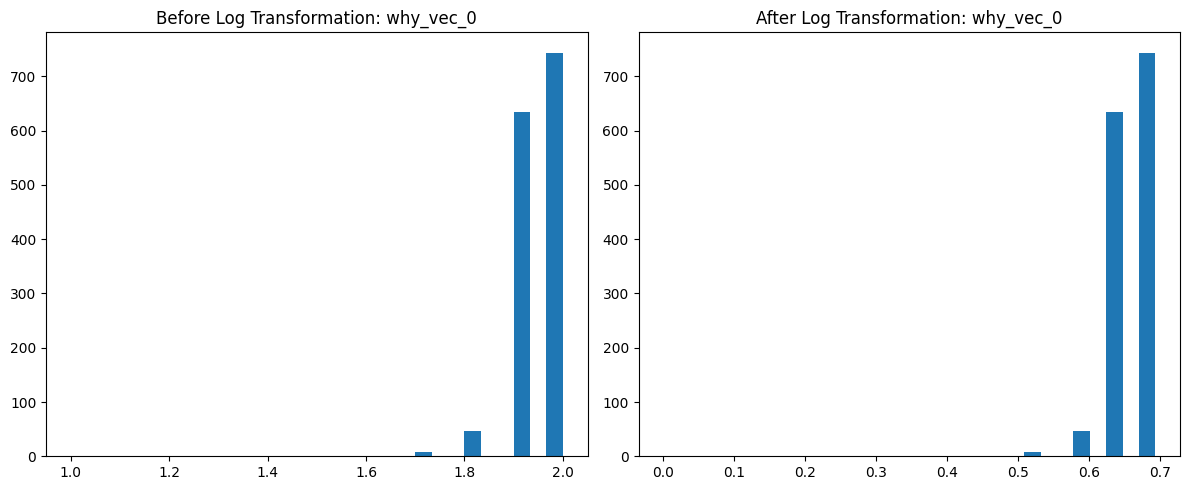

   Are you self-employed?  \
0                0.000000   
1                0.000000   
2                0.000000   
3                0.693147   
4                0.000000   

   How many employees does your company or organization have?  \
0                                           1.098612            
1                                           0.693147            
2                                           0.693147            
3                                           1.386294            
4                                           0.693147            

   Is your employer primarily a tech company/organization?  \
0                                           0.693147         
1                                           0.693147         
2                                           0.693147         
3                                           0.693147         
4                                           0.000000         

   Is your primary role within your company related to tech/I

In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('04_mental-health-scaled.csv')

# Step 1: Identify the features you want to transform (select only numerical columns)
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Step 2: Shift data if necessary (if there are zeros or negative values)
# For example, we add 1 to all values to avoid log(0) issues
df[numerical_columns] = df[numerical_columns].apply(lambda x: x + 1 - x.min() if (x <= 0).any() else x)

# Step 3: Apply log transformation to the selected numerical columns
df_log_transformed = df.copy()
df_log_transformed[numerical_columns] = np.log(df_log_transformed[numerical_columns])

# Optional: Plot before and after transformation for a feature to see the effect
feature = 'why_vec_0'  # Replace with an actual feature name
plt.figure(figsize=(12, 5))

# Plot before transformation
plt.subplot(1, 2, 1)
plt.hist(df[feature], bins=30)
plt.title(f'Before Log Transformation: {feature}')

# Plot after transformation
plt.subplot(1, 2, 2)
plt.hist(df_log_transformed[feature], bins=30)
plt.title(f'After Log Transformation: {feature}')

plt.tight_layout()
plt.show()

# Save the transformed dataset
df_log_transformed.to_csv('05_mental-health-log-transformed-dataset.csv', index=False)

# Check the first few rows of the transformed data
print(df_log_transformed.head())

### Check for association between features

P-value for Are you self-employed? vs How many employees does your company or organization have?: 6.208480542986538e-128
P-value for Are you self-employed? vs Is your employer primarily a tech company/organization?: 5.768564144516202e-19
P-value for Are you self-employed? vs Is your primary role within your company related to tech/IT?: 0.10434945882049257
P-value for Are you self-employed? vs If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:: 7.192690274741071e-116
P-value for Are you self-employed? vs Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?: 5.676031715718673e-07
P-value for Are you self-employed? vs Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?: 3.3649844872851964e-96
P-value for Are you self-employed? vs Do you know local or online resources to seek help for a ment

/var/folders/_5/ns_prwp1673_94nw9yv3t7pw0000gn/T/ipykernel_15528/544272911.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


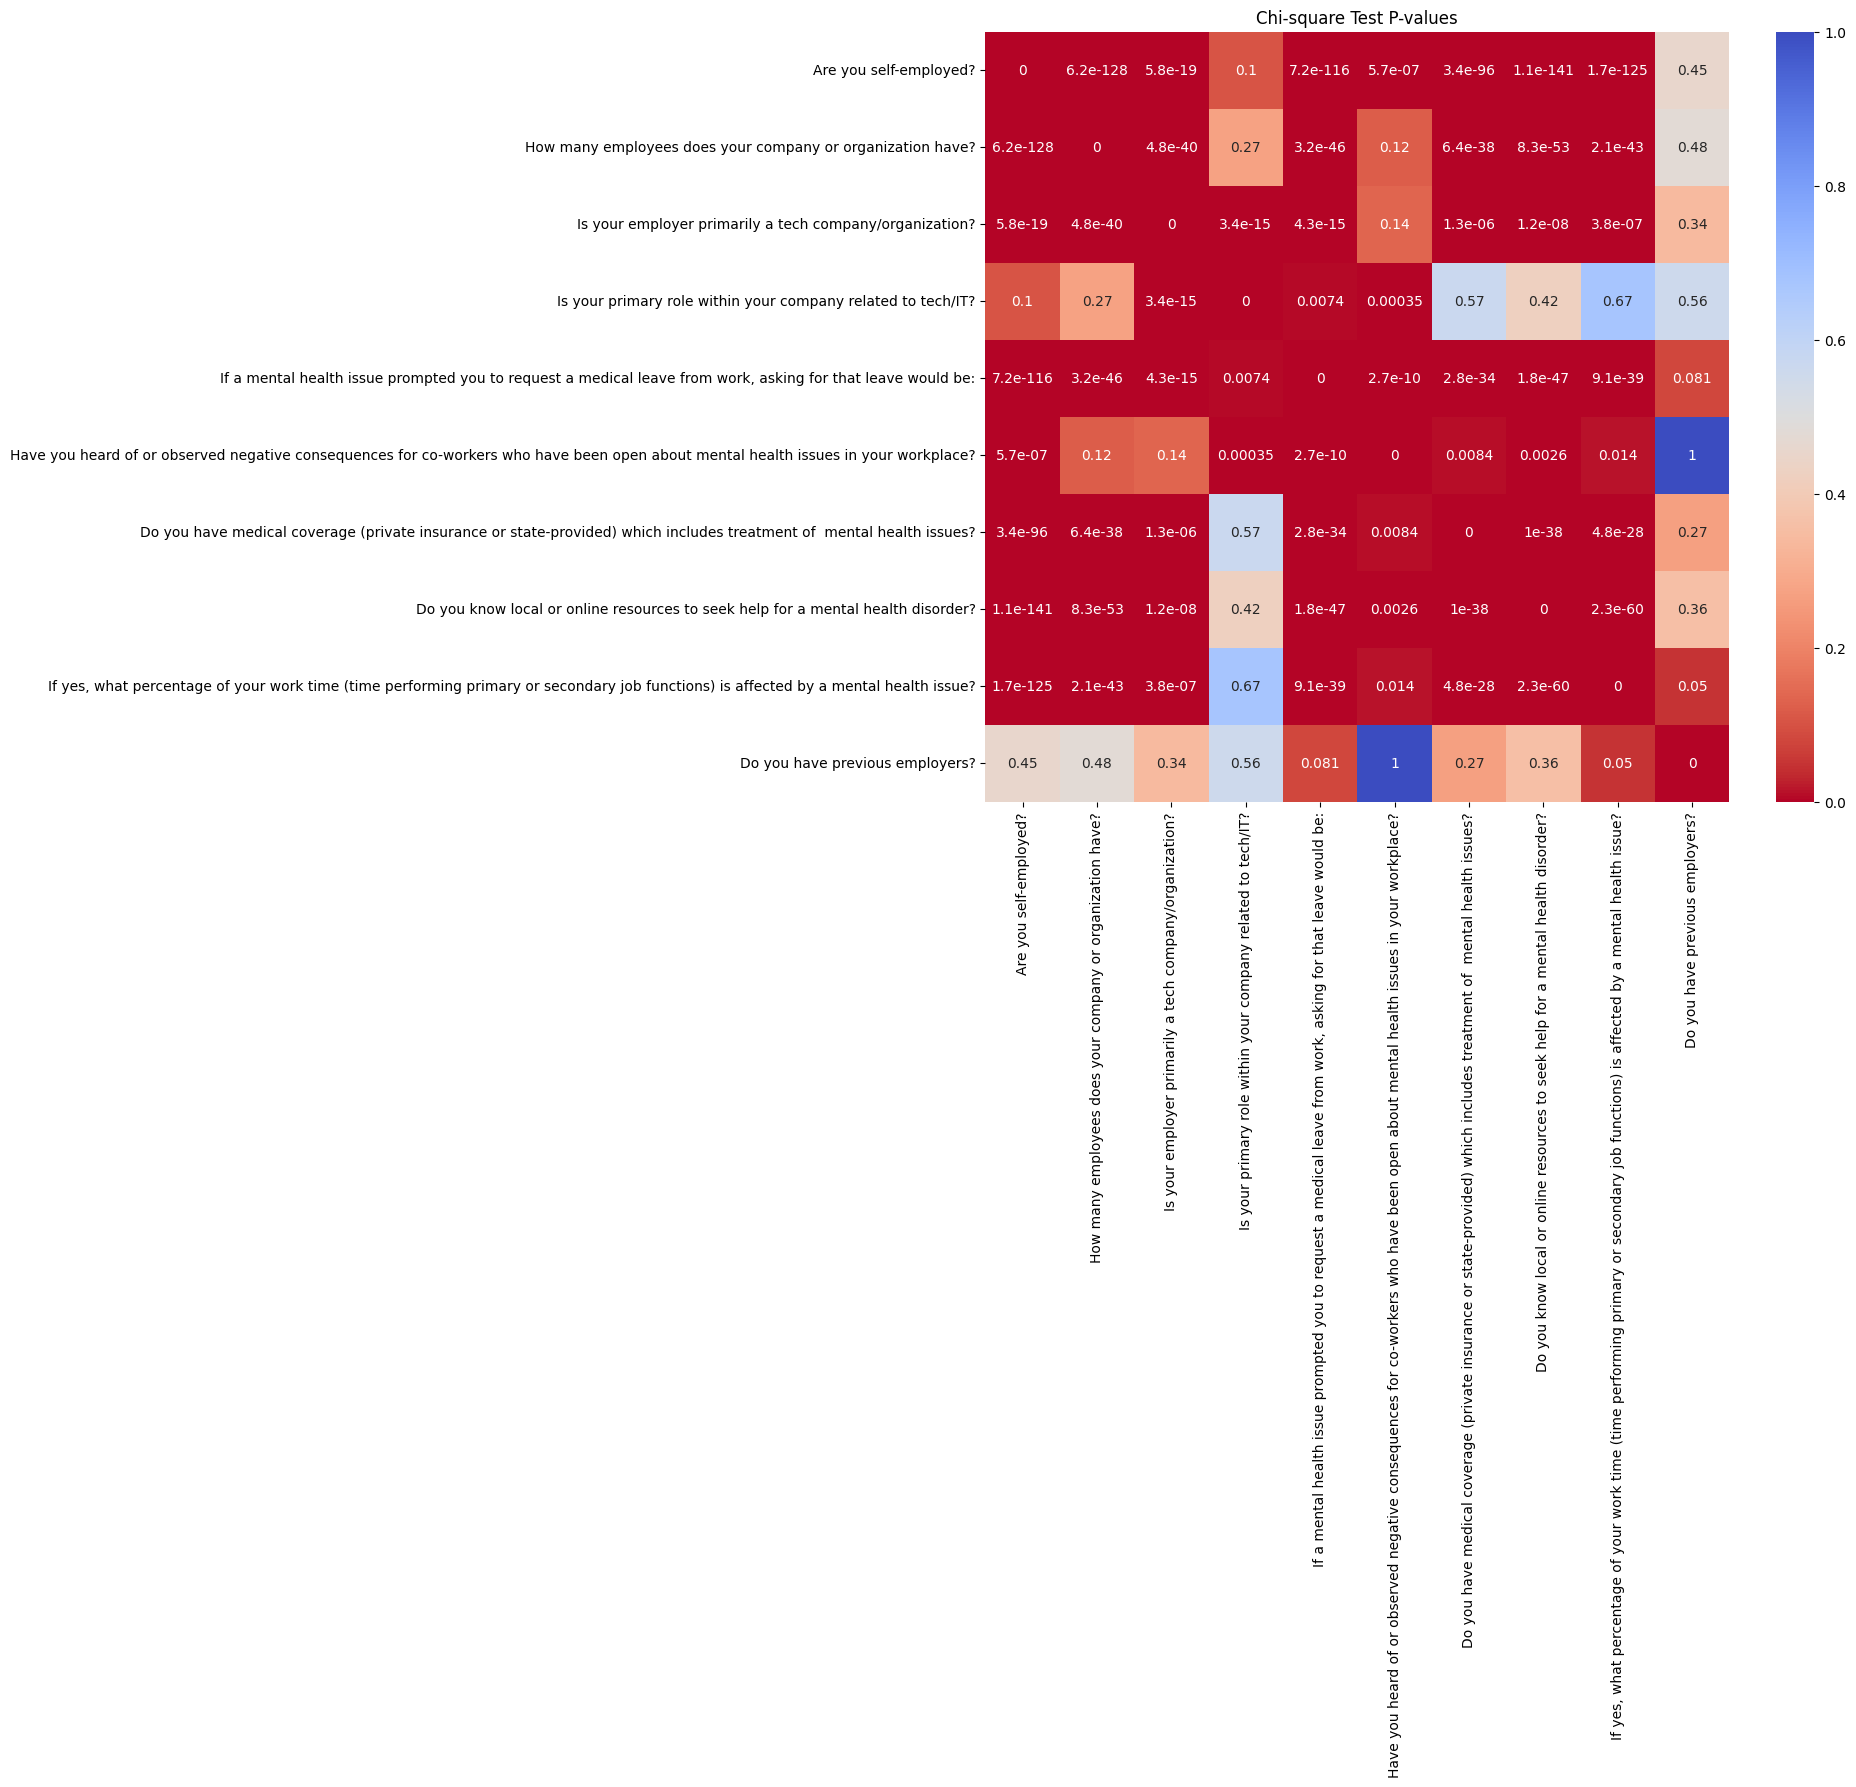

In [450]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('05_mental-health-log-transformed-dataset.csv')

# Function to perform chi-square test
def chi_square_test(df, feature1, feature2):
    contingency_table = pd.crosstab(df[feature1], df[feature2])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    return p_value

# Select a subset of features (e.g., the first 10) for demonstration
features = df.columns[:10]

# Create a matrix to store p-values
p_values = np.zeros((len(features), len(features)))

# Perform chi-square test for each pair of features and print p-values
for i, feat1 in enumerate(features):
    for j, feat2 in enumerate(features):
        if i != j:
            p_value = chi_square_test(df, feat1, feat2)
            p_values[i, j] = p_value
            print(f"P-value for {feat1} vs {feat2}: {p_value}")

# Visualize the p-values
plt.figure(figsize=(12, 10))
sns.heatmap(p_values, xticklabels=features, yticklabels=features, cmap='coolwarm_r', annot=True)
plt.title('Chi-square Test P-values')
plt.tight_layout()
plt.show()

###### Lower p-values (darker colors) indicate stronger evidence of association between variables.

### Exctracting Most Relevant Features ---> Highest Variance Approach

In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('05_mental-health-log-transformed-dataset.csv')

# Remove any non-numerical columns (if there are categorical columns, encode them beforehand)
df_numeric = df.select_dtypes(include=[np.number])

# Step 3: Calculate variance for each feature
variances = np.var(df, axis=0)
feature_variance = pd.Series(variances, index=df_numeric.columns)

# Step 4: Select the 20 features with the highest variance
top_20_features = feature_variance.nlargest(20).index
df_top_20 = df_numeric[top_20_features]

df_top_20.to_csv('06_mental-health-top-20-features.csv', index=False)

print(f"The top 20 features with the highest variance: {top_20_features}")

The top 20 features with the highest variance: Index(['If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
       'How willing would you be to share with friends and family that you have a mental illness?',
       'Do you work remotely?',
       'How many employees does your company or organization have?',
       'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
       'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
       'Do you think that discussing a mental health disorder with previous employers would have negative consequences?',
       'Do you think that discussing a physical health issue with previous employers would have negative consequences?',
       'If you

In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('05_mental-health-log-transformed-dataset.csv')

# Remove any non-numerical columns (if there are categorical columns, encode them beforehand)
df_numeric = df.select_dtypes(include=[np.number])

# Step 3: Calculate variance for each feature
variances = np.var(df, axis=0)
feature_variance = pd.Series(variances, index=df_numeric.columns)

# Step 4: Select the 20 features with the highest variance
top_50_features = feature_variance.nlargest(50).index
df_top_50 = df_numeric[top_50_features]

df_top_50.to_csv('06_mental-health-top-50-features.csv', index=False)

print(f"The top 50 features with the highest variance: {top_50_features}")

The top 50 features with the highest variance: Index(['If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
       'How willing would you be to share with friends and family that you have a mental illness?',
       'Do you work remotely?',
       'How many employees does your company or organization have?',
       'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
       'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
       'Do you think that discussing a mental health disorder with previous employers would have negative consequences?',
       'Do you think that discussing a physical health issue with previous employers would have negative consequences?',
       'If you

### Dimensionality Reduction --> PCA approach

In [1]:
# Apply PCA
import pandas as pd
from sklearn.decomposition import PCA

df = pd.read_csv('05_mental-health-log-transformed-dataset.csv', delimiter=",", header=0, on_bad_lines='skip', encoding='utf-8')

pca = PCA(n_components=0.95)  # Preserve 95% of variance
df_pca = pca.fit_transform(df)

# Convert the PCA-transformed data back into a DataFrame
# The columns will be labeled as PC1, PC2, ..., based on the number of components selected
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

df_pca.to_csv('07_mental-health-pca-reduced.csv', index=False)

In [2]:
print("Number of components:", pca.n_components_)

Number of components: 130


In [3]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.07103067 0.05552033 0.04804939 0.03686299 0.02880415 0.02623086
 0.02283971 0.02021937 0.01974007 0.01857917 0.01789339 0.01700082
 0.01610848 0.01537377 0.01495642 0.01450136 0.0142277  0.01398719
 0.0132035  0.01282427 0.01242708 0.01181663 0.01112061 0.01071779
 0.01031488 0.01018695 0.00985266 0.00969215 0.00948943 0.00914686
 0.00892136 0.00879223 0.00853082 0.00836303 0.00819532 0.00807166
 0.00790134 0.00764248 0.00738667 0.00732443 0.00711782 0.00697116
 0.00667764 0.00663881 0.00646083 0.00641166 0.00611366 0.00596546
 0.00580813 0.00578476 0.0055823  0.00543584 0.00537048 0.00531108
 0.00510157 0.0049274  0.00468523 0.00464649 0.00450646 0.00438784
 0.00435814 0.00425446 0.0041027  0.00392012 0.00384371 0.00376614
 0.00368154 0.00352081 0.00347342 0.0034051  0.00334112 0.00326852
 0.00318903 0.00314914 0.00306825 0.00304269 0.00300422 0.00288142
 0.00286061 0.00279076 0.00273643 0.00265589 0.00259498 0.00257911
 0.00255481 0.00249436 0.00244203 0.

### Clustering ---> PCA + KMeans

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using silhouette score
df = pd.read_csv('07_mental-health-pca-reduced.csv', delimiter=",", header=0, on_bad_lines='skip', encoding='utf-8')

silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

In [5]:
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print("Optimal number of clusters:", optimal_k)

Optimal number of clusters: 3


In [8]:
# Perform K-means clustering with optimal K
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

In [9]:
cluster_labels = kmeans.fit_predict(df_pca)

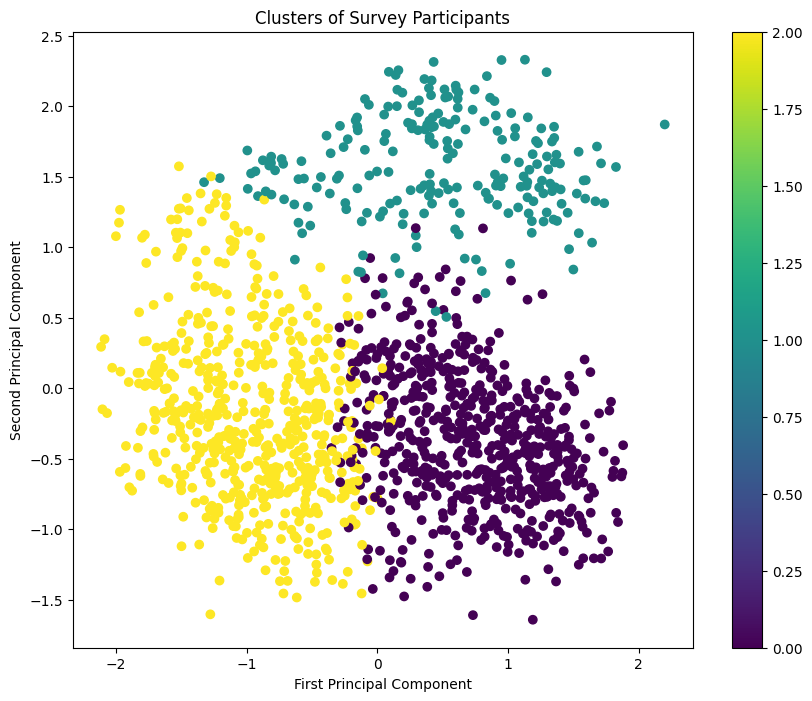

In [11]:
import matplotlib.pyplot as plt

# Visualize clusters in 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca.iloc[:, 0], df.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clusters of Survey Participants')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

/var/folders/_5/ns_prwp1673_94nw9yv3t7pw0000gn/T/ipykernel_34251/1900540757.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


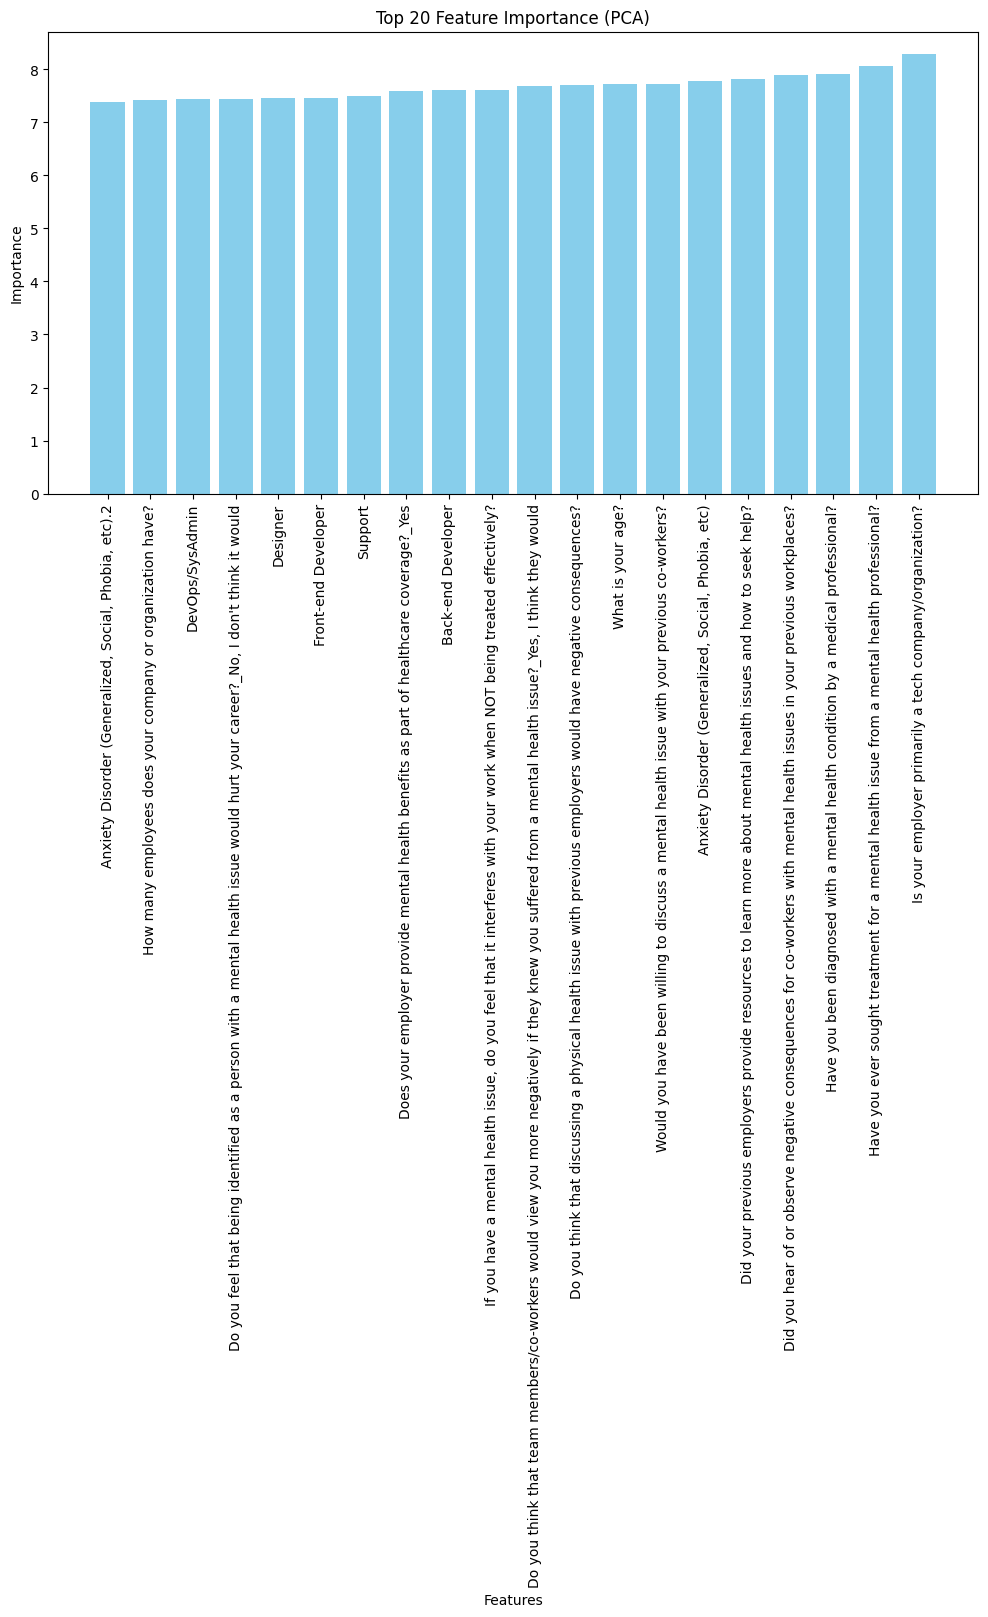

In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load your dataset
df = pd.read_csv('05_mental-health-log-transformed-dataset.csv')

# Step 2: Apply PCA (preserving 95% variance)
pca = PCA(n_components=0.95)  # This will automatically select the number of components to preserve 95% variance
pca.fit(df)

# Step 3: Get the PCA components and feature names
pca_components = pca.components_
feature_names = df.columns

# Step 4: Calculate the feature importance
# Sum of absolute values of PCA components across all principal components to get feature importance
feature_importance = np.sum(np.abs(pca_components), axis=0)

# Step 5: Sort features by importance
sorted_idx = feature_importance.argsort()
sorted_importance = feature_importance[sorted_idx]
sorted_features = np.array(feature_names)[sorted_idx]

# Step 6: Plot the top 20 features (or fewer if there are less than 20)
n_top_features = min(20, len(sorted_features))

plt.figure(figsize=(12, 6))
plt.bar(range(n_top_features), sorted_importance[-n_top_features:], tick_label=sorted_features[-n_top_features:], color='skyblue')
plt.title('Top 20 Feature Importance (PCA)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Step 7: Optionally save the top 20 features to a new CSV file
df_top_20 = df[sorted_features[-n_top_features:]]
df_top_20.to_csv('06_mental-health-top-20-features.csv', index=False)

In [31]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from IPython.display import display, Markdown

# Load your original dataset (before PCA) to retain the original feature names
df_original = pd.read_csv('05_mental-health-log-transformed-dataset.csv')  # The original dataset with feature names

# Load your PCA-reduced dataset with cluster labels
df_pca = pd.read_csv('07_mental-health-pca-reduced.csv')

# Assuming you already have cluster labels from the previous step
df_pca['Cluster'] = cluster_labels  # Replace `cluster_labels` with your actual KMeans cluster labels

# Map back the PCA components to the original features
pca = PCA(n_components=0.95)
pca.fit(df_original)  # Fit PCA on the original dataset to extract the components
components = pca.components_  # PCA components

# Now, we create a DataFrame that maps each PC to the original features
pca_importance_df = pd.DataFrame(components, columns=df_original.columns)

# Add cluster labels to the PCA-reduced data
df_pca_with_clusters = pd.DataFrame(df_pca)  # Add original PCA data
df_pca_with_clusters['Cluster'] = cluster_labels  # Add cluster labels

# Perform cluster analysis and print characteristics of each cluster
optimal_k = len(set(cluster_labels))  # Number of clusters from KMeans

# Loop over each cluster and print the top contributing original features
for i in range(optimal_k):
    print(f"\nCluster {i} characteristics:")
    
    # Get the data for the current cluster
    cluster_data = df_pca_with_clusters[df_pca_with_clusters['Cluster'] == i]
    
    # Calculate the mean of each principal component for the cluster
    cluster_mean = cluster_data.mean().sort_values(ascending=False)
    
    # Filter out the "Cluster" column if it's in the mean index
    cluster_mean = cluster_mean.drop('Cluster', errors='ignore')
    
    # Map the top PCA components to the original features and their importance
    feature_importance = pd.Series(dtype=float)
    
    for pc in cluster_mean.index[:10]:  # For the top 10 PCs for the cluster
        pc_num = int(pc.replace('PC', '')) - 1  # Extract PC number
        # Sum the importance of original features across these top 10 PCA components
        feature_importance = feature_importance.add(pca_importance_df.iloc[pc_num].abs(), fill_value=0)
    
    # Get the top 10 contributing original features across the top PCA components
    top_original_features = feature_importance.sort_values(ascending=False).head(10)
    
    # Create a markdown table for each cluster
    table_data = [[feature, round(importance, 4)] for feature, importance in top_original_features.items()]
    df_table = pd.DataFrame(table_data, columns=['Original Feature', 'Importance'])
    
    # Display the table in markdown format
    display(Markdown(f"### Cluster {i} Top 10 Contributing Features"))
    display(Markdown(df_table.to_markdown(index=False)))


Cluster 0 characteristics:


### Cluster 0 Top 10 Contributing Features

| Original Feature                                                                                                       |   Importance |
|:-----------------------------------------------------------------------------------------------------------------------|-------------:|
| If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:            |       1.2475 |
| Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces? |       1.0625 |
| Have you had a mental health disorder in the past?_Yes                                                                 |       1.0465 |
| Do you feel that being identified as a person with a mental health issue would hurt your career?_Maybe                 |       0.9906 |
| Does your employer provide mental health benefits as part of healthcare coverage?_Yes                                  |       0.9882 |
| How willing would you be to share with friends and family that you have a mental illness?                              |       0.9875 |
| If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?   |       0.9848 |
| Do you currently have a mental health disorder?_No                                                                     |       0.9752 |
| Would you have been willing to discuss a mental health issue with your direct supervisor(s)?                           |       0.9566 |
| If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?       |       0.9531 |


Cluster 1 characteristics:


### Cluster 1 Top 10 Contributing Features

| Original Feature                                                                                                                                                                     |   Importance |
|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------:|
| Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?                                         |       1.3361 |
| Would you bring up a mental health issue with a potential employer in an interview?_Maybe                                                                                            |       1.2949 |
| Would you bring up a mental health issue with a potential employer in an interview?_No                                                                                               |       1.2214 |
| If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?                                                                     |       1.2211 |
| How willing would you be to share with friends and family that you have a mental illness?                                                                                            |       1.221  |
| Would you be willing to bring up a physical health issue with a potential employer in an interview?_No                                                                               |       1.2099 |
| Do you feel that being identified as a person with a mental health issue would hurt your career?_Maybe                                                                               |       1.002  |
| What is your gender?_Male                                                                                                                                                            |       0.9905 |
| Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?_Yes |       0.9856 |
| Do you think that discussing a physical health issue with previous employers would have negative consequences?                                                                       |       0.9384 |


Cluster 2 characteristics:


### Cluster 2 Top 10 Contributing Features

| Original Feature                                                                                                                                            |   Importance |
|:------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------:|
| Do you think that discussing a mental health disorder with previous employers would have negative consequences?                                             |       1.3212 |
| If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:                                                 |       1.2214 |
| Do you think that discussing a physical health issue with previous employers would have negative consequences?                                              |       1.1176 |
| Front-end Developer                                                                                                                                         |       1.103  |
| If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?                                            |       1.0939 |
| Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?                |       1.0748 |
| Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?_I don't know |       0.9906 |
| Do you know the options for mental health care available under your employer-provided coverage?_No                                                          |       0.9652 |
| Were you aware of the options for mental health care provided by your previous employers?_N/A (not currently aware)                                         |       0.9455 |
| Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?                                      |       0.9378 |

#### 	•	Cluster 0: “High Self-Disclosure and Awareness”
#####  -> The features suggest a high level of comfort discussing health openly, with access to resources and self-awareness regarding mental health.
#### 	•	Cluster 1: “Struggling with Mental Health but Hesitant to Disclose” 
#####  -> The cluster shows people dealing with diagnosed mental health conditions but reluctant to disclose them in professional environments.
#### 	•	Cluster 2: “Diagnosed but Undisclosed”
#####  -> The features suggest individuals diagnosed with mental health conditions but not      engaging in disclosure or open discussion within their workplace.

In [40]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from IPython.display import display, Markdown

# Load your original dataset (before PCA) to retain the original feature names
df_original = pd.read_csv('05_mental-health-log-transformed-dataset.csv')  # The original dataset with feature names

# Load your PCA-reduced dataset with cluster labels
df_pca = pd.read_csv('07_mental-health-pca-reduced.csv')

# Assuming you already have cluster labels from the previous step
df_pca['Cluster'] = cluster_labels  # Replace `cluster_labels` with your actual KMeans cluster labels

# Map back the PCA components to the original features
pca = PCA(n_components=0.95)
pca.fit(df_original)  # Fit PCA on the original dataset to extract the components
components = pca.components_  # PCA components

# Now, we create a DataFrame that maps each PC to the original features
pca_importance_df = pd.DataFrame(components, columns=df_original.columns)

# Titles and descriptions for each cluster
cluster_titles = {
    0: "Cluster 0: “High Self-Disclosure and Awareness”",
    1: "Cluster 1: “Struggling with Mental Health but Hesitant to Disclose”",
    2: "Cluster 2: “Diagnosed but Undisclosed”"
}

cluster_descriptions = {
    0: "The features suggest a high level of comfort discussing health openly, with access to resources and self-awareness regarding mental health.",
    1: "The cluster shows people dealing with diagnosed mental health conditions but reluctant to disclose them in professional environments.",
    2: "The features suggest individuals diagnosed with mental health conditions but not engaging in disclosure or open discussion within their workplace."
}

# Perform cluster analysis and print characteristics of each cluster
optimal_k = len(set(cluster_labels))  # Number of clusters from KMeans

# Loop over each cluster and print the top contributing original features
for i in range(optimal_k):
    # Display the title and description dynamically based on the cluster number
    display(Markdown(f"### {cluster_titles[i]}"))
    display(Markdown(cluster_descriptions[i]))
    
    # Get the data for the current cluster
    cluster_data = df_pca[df_pca['Cluster'] == i]
    
    # Calculate the mean of each principal component for the cluster
    cluster_mean = cluster_data.mean().sort_values(ascending=False)
    
    # Filter out the "Cluster" column if it's in the mean index
    cluster_mean = cluster_mean.drop('Cluster', errors='ignore')
    
    # Map the top PCA components to the original features and their importance
    feature_importance = pd.Series(dtype=float)
    
    for pc in cluster_mean.index[:10]:  # For the top 10 PCs for the cluster
        pc_num = int(pc.replace('PC', '')) - 1  # Extract PC number
        # Sum the importance of original features across these top 10 PCA components
        feature_importance = feature_importance.add(pca_importance_df.iloc[pc_num].abs(), fill_value=0)
    
    # Get the top 10 contributing original features across the top PCA components
    top_original_features = feature_importance.sort_values(ascending=False).head(10)
    
    # Create a markdown table for each cluster
    table_data = [[feature, round(importance, 4)] for feature, importance in top_original_features.items()]
    df_table = pd.DataFrame(table_data, columns=['Original Feature', 'Importance'])
    
    # Display the table in markdown format
    display(Markdown(df_table.to_markdown(index=False)))

### Cluster 0: “High Self-Disclosure and Awareness”

The features suggest a high level of comfort discussing health openly, with access to resources and self-awareness regarding mental health.

| Original Feature                                                                                                       |   Importance |
|:-----------------------------------------------------------------------------------------------------------------------|-------------:|
| If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:            |       1.2475 |
| Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces? |       1.0625 |
| Have you had a mental health disorder in the past?_Yes                                                                 |       1.0465 |
| Do you feel that being identified as a person with a mental health issue would hurt your career?_Maybe                 |       0.9906 |
| Does your employer provide mental health benefits as part of healthcare coverage?_Yes                                  |       0.9882 |
| How willing would you be to share with friends and family that you have a mental illness?                              |       0.9875 |
| If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?   |       0.9848 |
| Do you currently have a mental health disorder?_No                                                                     |       0.9752 |
| Would you have been willing to discuss a mental health issue with your direct supervisor(s)?                           |       0.9566 |
| If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?       |       0.9531 |

### Cluster 1: “Struggling with Mental Health but Hesitant to Disclose”

The cluster shows people dealing with diagnosed mental health conditions but reluctant to disclose them in professional environments.

| Original Feature                                                                                                                                                                     |   Importance |
|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------:|
| Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?                                         |       1.3361 |
| Would you bring up a mental health issue with a potential employer in an interview?_Maybe                                                                                            |       1.2949 |
| Would you bring up a mental health issue with a potential employer in an interview?_No                                                                                               |       1.2214 |
| If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?                                                                     |       1.2211 |
| How willing would you be to share with friends and family that you have a mental illness?                                                                                            |       1.221  |
| Would you be willing to bring up a physical health issue with a potential employer in an interview?_No                                                                               |       1.2099 |
| Do you feel that being identified as a person with a mental health issue would hurt your career?_Maybe                                                                               |       1.002  |
| What is your gender?_Male                                                                                                                                                            |       0.9905 |
| Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?_Yes |       0.9856 |
| Do you think that discussing a physical health issue with previous employers would have negative consequences?                                                                       |       0.9384 |

### Cluster 2: “Diagnosed but Undisclosed”

The features suggest individuals diagnosed with mental health conditions but not engaging in disclosure or open discussion within their workplace.

| Original Feature                                                                                                                                            |   Importance |
|:------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------:|
| Do you think that discussing a mental health disorder with previous employers would have negative consequences?                                             |       1.3212 |
| If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:                                                 |       1.2214 |
| Do you think that discussing a physical health issue with previous employers would have negative consequences?                                              |       1.1176 |
| Front-end Developer                                                                                                                                         |       1.103  |
| If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?                                            |       1.0939 |
| Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?                |       1.0748 |
| Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?_I don't know |       0.9906 |
| Do you know the options for mental health care available under your employer-provided coverage?_No                                                          |       0.9652 |
| Were you aware of the options for mental health care provided by your previous employers?_N/A (not currently aware)                                         |       0.9455 |
| Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?                                      |       0.9378 |